# 共享单车预测题目：
<br>(1)CSV文件，包含韩国首尔地区从2017年12月1日到2018年11月30日（365天）的租车数据;</br>
<br>(2)每天的监测时间点为0时，1时......到23时，共24个时间节点，365天共计365*24=8760个数据样本;</br>
<br>(3)和租车数量相关的特征项为12项；</br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

## 数据预处理

In [2]:
#导入数据
data=pd.read_csv('./project1.csv',encoding='GBK')

In [3]:
pd.DataFrame(data.columns.values)

,0
0,Date
1,Rented Bike Count
2,Hour
3,Temperature(癈)
4,Humidity(%)
5,Wind speed (m/s)
6,Visibility (10m)
7,Dew point temperature(癈)
8,Solar Radiation (MJ/m2)
9,Rainfall(mm)


In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(癈)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(癈)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

### LabelEncoder将字符串数据转换为数值型
***将季节，假期，工作日为字符型 转换为数值型***

In [7]:
# 单独将Seasons的这个特征进行处理，一会画图会用到反编码获取季节
from sklearn.preprocessing import LabelEncoder
data_feature=['Seasons','Holiday','Functioning Day']
labelencoder_Seasons=LabelEncoder()
data[data_feature[0]]=labelencoder_Seasons.fit_transform(data[data_feature[0]])

In [8]:
from sklearn.preprocessing import LabelEncoder
data_feature=['Seasons','Holiday','Functioning Day']
labelencoder=LabelEncoder()
for feature in data_feature[1:]:
    data[feature]=labelencoder.fit_transform(data[feature])

In [9]:
#将所有的特征进行数值编码
# from sklearn.preprocessing import LabelEncoder
# data_feature=['Seasons','Holiday','Functioning Day']
# labelencoder=LabelEncoder()
# for feature in data_feature:
#     data[feature]=labelencoder.fit_transform(data[feature])

In [10]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1


In [11]:
data[data_feature].head()

,Seasons,Holiday,Functioning Day
0,3,1,1
1,3,1,1
2,3,1,1
3,3,1,1
4,3,1,1


### 将日期为10,20,30拆分

In [12]:
# test=[]
# train=[]
# for i in range(len(data['Date'])):
#     if datetime.datetime.strptime(data['Date'][i],"%d/%m/%Y").day in [10,20,30]:
#         test.append(data.iloc[i,:])
#     else:
#         train.append(data.iloc[i,:])
# test=pd.DataFrame(test)
# train=pd.DataFrame(train)

## 提取数据特征

#### 不添加数据的效果

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.iloc[:,2:]
y=data.iloc[:,1]
# standardScaler=StandardScaler()
# X=standardScaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666,test_size=0.2)
from sklearn import datasets,ensemble
clf = ensemble.RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.8815188481367832

In [21]:
from sklearn.metrics import mean_squared_error as MSE
y_pre=clf.predict(X_test)
MSE(y_pre,y_test)

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:157: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


52383.87131792237

#### 添加周几

In [36]:
a=datetime.datetime.now().second
date=[]
for d in data['Date']:
    date.append(datetime.datetime.strptime(d,"%d/%m/%Y").weekday()+1)  
data=pd.concat([data,pd.DataFrame(date,columns=['weekday'])],axis=1)
# data['weekday']=pd.DataFrame(data=weekday) 

#### 添加是否是周末

In [37]:
isweekend=[]
for d in data['weekday']:
    if d>5:
        isweekend.append(1)
    else:
        isweekend.append(0)
data=pd.concat([data,pd.DataFrame(isweekend,columns=['isweekend'])],axis=1)
# data['isweekend']=pd.DataFrame(data=isweekend)  

#### 添加日期

In [38]:
day=[]
for d in data['Date']:
    day.append(datetime.datetime.strptime(d,"%d/%m/%Y").day)
data['day']=pd.DataFrame(data=day)  

#### 添加月份

In [39]:
month=[]
for d in data['Date']:
    month.append(datetime.datetime.strptime(d,"%d/%m/%Y").month)
data['month']=pd.DataFrame(data=month)  

In [50]:
#查看添加的数据
data.head().iloc[:,[0,-4,-3,-2,-1]]

,Date,weekday,isweekend,day,month
0,01/12/2017,5,0,1,12
1,01/12/2017,5,0,1,12
2,01/12/2017,5,0,1,12
3,01/12/2017,5,0,1,12
4,01/12/2017,5,0,1,12


#### 数据保存

In [3]:
data.to_csv("./data_bikes.csv")

## 数据分析

In [4]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(癈)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(癈)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### hour

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


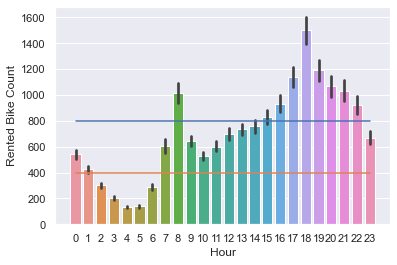

In [25]:
import seaborn as sns
sns.barplot(x='Hour',y='Rented Bike Count',data=data)
plt.plot([800]*24)
plt.plot([400]*24)

###### 在早上8点和下午17,18,19点租车的数量明显变高

### Temperature(癈)

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


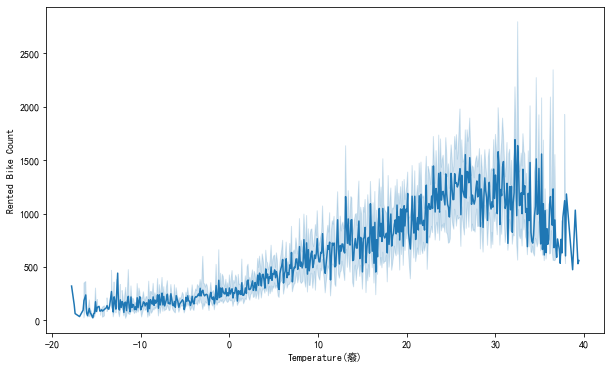

In [16]:
import seaborn as sns
plt.figure(figsize=(10,6)) 
sns.lineplot(x='Temperature(癈)',y='Rented Bike Count',data=data)

### 季节

In [52]:
labelencoder_Seasons.inverse_transform(data['Seasons'])

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['Winter', 'Winter', 'Winter', ..., 'Autumn', 'Autumn', 'Autumn'],
      dtype=object)

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


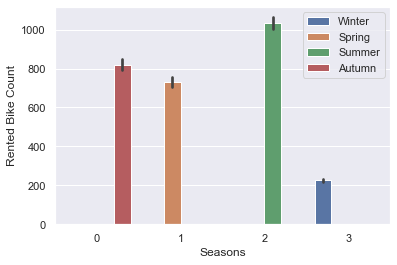

In [66]:
sns.barplot(data=data, x="Seasons", y="Rented Bike Count",hue=labelencoder_Seasons.inverse_transform(data['Seasons']))

###### 夏天的租车数量明显最高，冬天最少

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


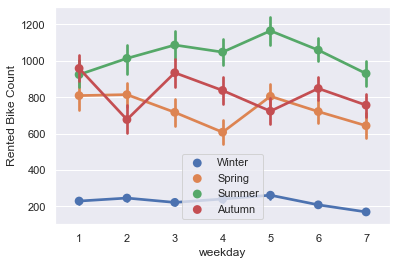

In [55]:
import seaborn as sns 
# sns.pointplot(data=data, x="weekday", y="Rented Bike Count", hue="Seasons")
sns.set()
sns.pointplot(data=data, x="weekday", y="Rented Bike Count", hue=labelencoder_Seasons.inverse_transform(data['Seasons']))

######  查看一年四个季节一周一周内的租车数量，其中冬天租车的数量最少，夏天的租车的数量在最高。除了秋天其他季节的周五租车的数量有所增加

### 湿度

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


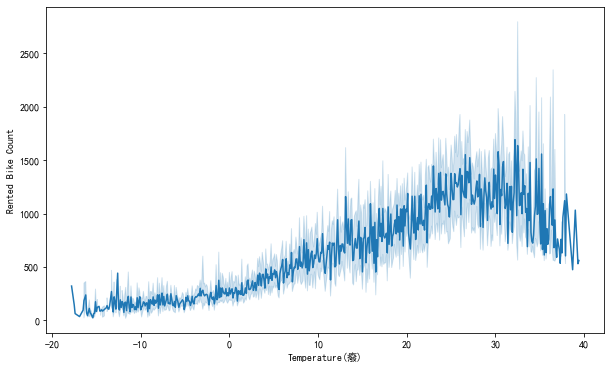

In [19]:
plt.figure(figsize=(10,6)) 
sns.lineplot(x='Temperature(癈)',y='Rented Bike Count',data=data)

### 风速

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


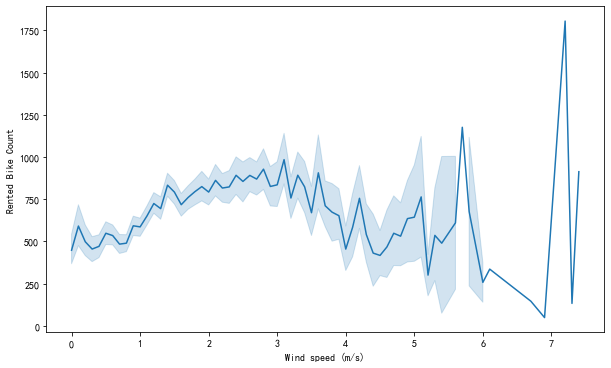

In [24]:
plt.figure(figsize=(10,6)) 
sns.lineplot(x='Wind speed (m/s)',y='Rented Bike Count',data=data)

###### 风速这个特征，其实和风速有很大的区别，上述是通过seaborn 的统计，这里算的是mean,下面通过算sum,俩观察风速和租车数量的关系。

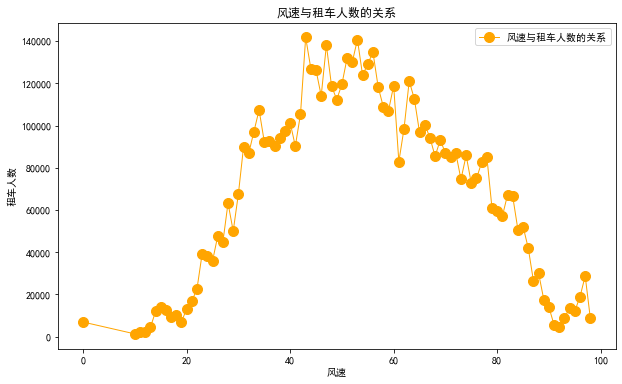

In [11]:
plt.figure(figsize=(10,6)) 
plt.plot(data["Rented Bike Count"].groupby(data['Humidity(%)']).sum(),color='orange', lw=1, ls='-', marker='o', markersize=10)
plt.title('风速与租车人数的关系')
plt.xlabel('风速')
plt.ylabel('租车人数')
plt.legend(["风速与租车人数的关系"], loc=0)  # 图例

##### 风速大的时候租车数量很少

### 能见度

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


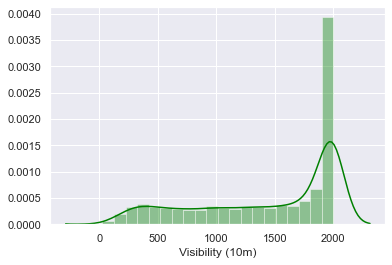

In [60]:
sns.distplot(data['Visibility (10m)'],color='green')

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


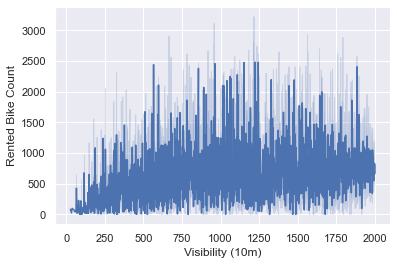

In [67]:
sns.lineplot(x='Visibility (10m)',y='Rented Bike Count',data=data)

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


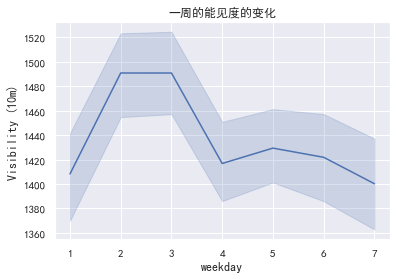

In [105]:
# sns.lineplot(y='Visibility (10m)',x='weekday',data=data )
sns.lineplot(y=data['Visibility (10m)'],x=data['weekday'])
x=plt.title("一周的能见度的变化")

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


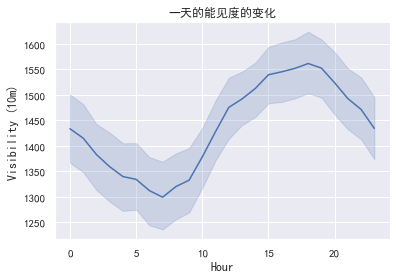

In [108]:
sns.lineplot(y='Visibility (10m)',x='Hour',data=data)
x=plt.title("一天的能见度的变化")

###### 能见度和租车数量关系不是特别大（除了个别极端天气），因为能见度和这一天的时间段有关

### 露点温度
###### 露点（Dew point），又称露点温度（Dew point temperature），在气象学中是指在固定气压之下，空气中所含的气态水达到饱和而凝结成液态水所需要降至的温度。在此温度时，凝结的液态水如果飘浮在空中被称为雾；而如果沾在固体表面上时则称为露，因而得名露点。

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


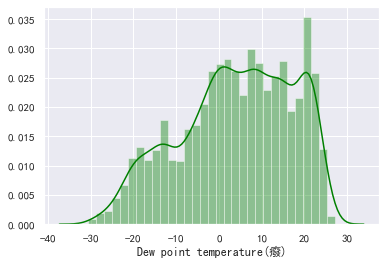

In [110]:
sns.distplot(data['Dew point temperature(癈)'],color='green')

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


C:\Users\karlieswift\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30280 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\karlieswift\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 30280 missing from current font.
  font.set_text(s, 0, flags=flags)


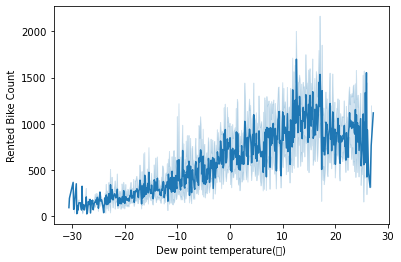

In [193]:
sns.lineplot(x='Dew point temperature(癈)',y='Rented Bike Count',data=data)

### 降雨量

In [115]:
data["Rainfall(mm)"].describe()

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


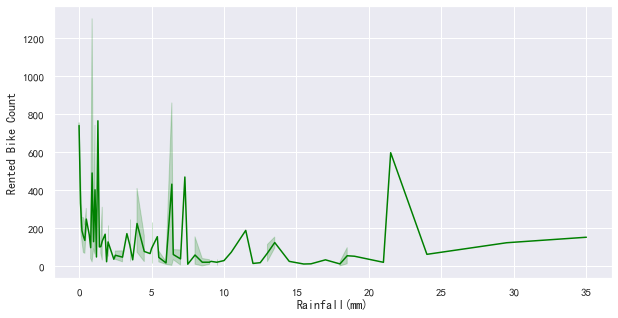

In [140]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Rainfall(mm)',y='Rented Bike Count',data=data,color='green')

In [131]:
data.loc[data["Rainfall(mm)"] >20]

,Date,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,isweekend,day,month
3997,16/05/2018,151,13,21.8,97,2.4,682,21.2,0.06,35.0,0.0,1,1,1,3,0,16,5
5034,28/06/2018,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,2,1,1,4,0,28,6
5132,02/07/2018,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,2,1,1,1,0,2,7
6501,28/08/2018,122,21,22.9,98,2.1,1146,22.5,0.00,29.5,0.0,2,1,1,2,0,28,8
6524,29/08/2018,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,2,1,1,3,0,29,8


###### 降雨量增加租出数量降底，20-25有所升高，只是个别数据

### 降雪

In [138]:
data['Snowfall (cm)'].describe()

count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


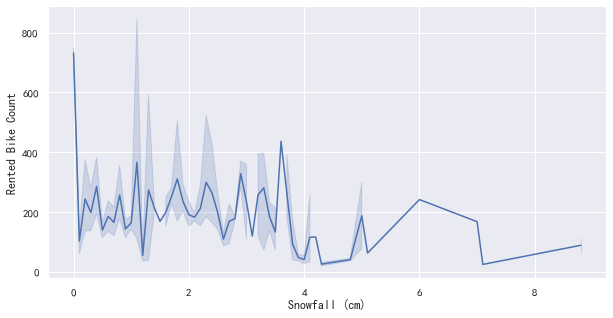

In [139]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Snowfall (cm)',y='Rented Bike Count',data=data)

### 太阳辐射Solar Radiation 

C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


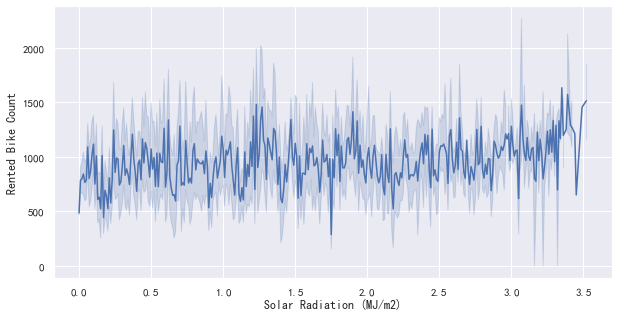

In [143]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data,x="Solar Radiation (MJ/m2)",y='Rented Bike Count')

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\karlieswift\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will 

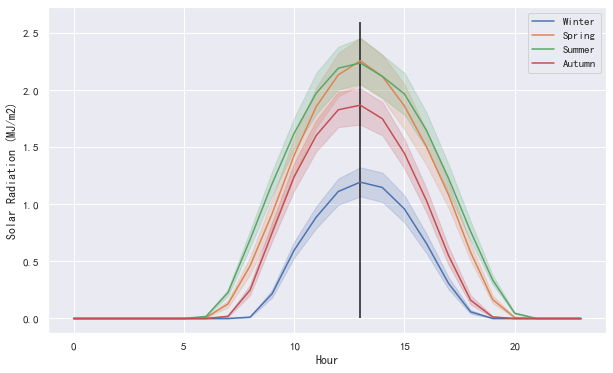

In [172]:
plt.figure(figsize=(10,6))
plt.vlines(x=13,ymin=0,ymax=2.6)
sns.lineplot(data=data,y="Solar Radiation (MJ/m2)",x='Hour',hue=labelencoder_Seasons.inverse_transform(data['Seasons']))

###### 太阳辐射最高集中在中午13点，同时春天和夏天的辐射更大，秋天和冬天的辐射量更少

### 工作日占比

(-1.1181405001194225,
 1.3092161685677979,
 -1.1081232490824533,
 1.1059488846361885)

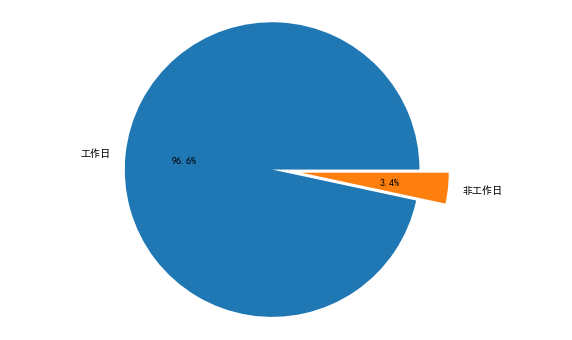

In [18]:
plt.figure(figsize=(10,6))
label = ["工作日","非工作日"]  
size = [(data['Functioning Day']==1).sum(),(data['Functioning Day']==0).sum()] 
explode = (0, 0.2)  
plt.pie(size,explode=explode,labels=label, autopct='%1.1f%%') 
plt.axis('equal')

### 周末的租车数量

<BarContainer object of 8760 artists>

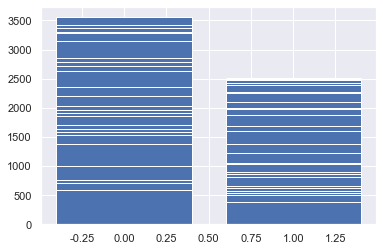

In [32]:
sns.set()
plt.bar(data['isweekend'],height=data['Rented Bike Count'])

In [50]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(癈),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(癈),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,weekday,isweekend
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,5,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,5,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,5,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,5,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,5,0


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.iloc[:,2:]
y=data.iloc[:,1]
standardScaler=StandardScaler()
X=standardScaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666,test_size=0.2)
# from sklearn.model_selection import KFold
from sklearn import datasets,ensemble
# kfold = KFold(n_splits=3, shuffle=True, random_state=42)
clf = ensemble.RandomForestRegressor(n_estimators=80)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.8798213002052507

## 模型预测

In [ ]:
# test=[]
# train=[]
# for i in range(len(data['Date'])):
#     if datetime.datetime.strptime(data['Date'][i],"%d/%m/%Y").day in [10,20,30]:
#         test.append(data.iloc[i,:])
#     else:
#         train.append(data.iloc[i,:])
# test=pd.DataFrame(test)
# train=pd.DataFrame(train)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import datetime
data=pd.read_csv('./data_bikes.csv',index_col=0)

### 集成学习

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=data.iloc[:,2:]
y=data.iloc[:,1]
# standardScaler=StandardScaler()
# X=standardScaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666,test_size=0.2)
from sklearn import datasets,ensemble
rfr = ensemble.RandomForestRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9401733128960488

In [14]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X=data.iloc[:,2:]
y=data.iloc[:,1]
# standardScaler=StandardScaler()
# X=standardScaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666,test_size=0.2)
from sklearn import datasets,ensemble
params = [{'n_estimators': [10,100,1000]},
              {'max_depth': range(5, 20)},
              {'min_samples_split': range(2, 30, 4)}]
rfr = ensemble.RandomForestRegressor()
model =GridSearchCV(rfr, params, cv=5)
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\karlieswift\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Wall time: 3min 40s


In [16]:
model.param_grid

[{'n_estimators': [10, 100, 1000]},
 {'max_depth': range(5, 20)},
 {'min_samples_split': range(2, 30, 4)}]

In [21]:
model.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
model.score(X_test,y_test)

0.941318567118985

In [17]:
from sklearn import datasets,ensemble
rfr = ensemble.BaggingRegressor(n_estimators=80)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9401946073897351

In [37]:
from sklearn import datasets,ensemble
rfr = ensemble.GradientBoostingRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.869291404061707

In [22]:
from sklearn import datasets,ensemble
rfr = ensemble.ExtraTreesRegressor(n_estimators=100)
rfr.fit(X_train,y_train)
rfr.score(X_test,y_test)

0.9546510816588163

In [39]:
rfr.score(X_train,y_train)

0.9999999999997211

In [24]:
# from sklearn.cross_validation  import cross_val_score
# cross_val_score(clf, X_train,y_train, cv=10).mean()

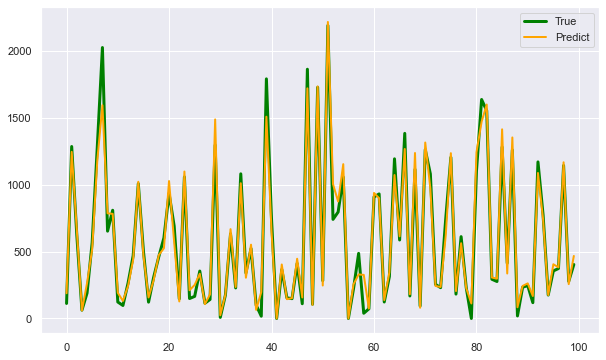

In [23]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test[:100]),c="green",label= "True",lw=3)
plt.plot(rfr.predict(X_test)[:100],c="orange",label = "Predict",lw=2)
plt.legend()

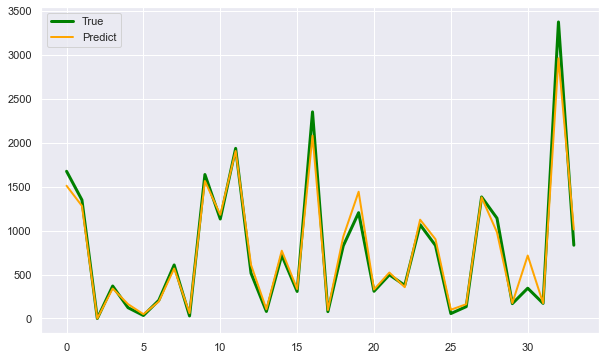

In [25]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))
plt.plot(np.array(y_test[1666:1700]),c="green",label= "True",lw=3)
plt.plot(rfr.predict(X_test)[1666:1700],c="orange",label = "Predict",lw=2)
plt.legend()

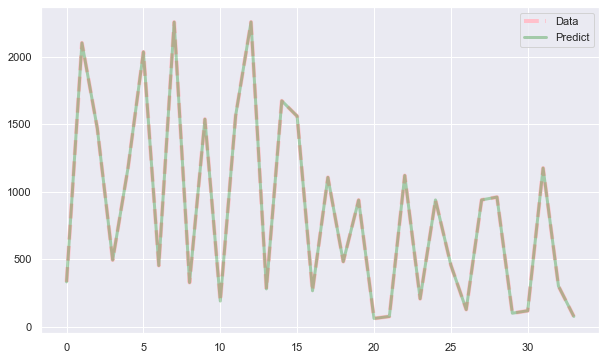

In [36]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,6))
plt.plot(np.array(y_train[1666:1700]),c="pink",label= "Data",linestyle='--',lw=4)
plt.plot(rfr.predict(X_train)[1666:1700],c="green",label = "Predict",linewidth=3,alpha=0.3)
plt.legend()

In [30]:
from sklearn.metrics import mean_squared_error as MSE
y_hat=rfr.predict(X_train)
MSE(y_hat,y_train)

0.0

In [33]:
from sklearn.metrics import mean_squared_error as MSE
y_pre=rfr.predict(X_test)
MSE(y_pre,y_test)

20954.975689269406

### MLP

###### 神经网络算法需要对数据归一化

In [40]:
from sklearn.neural_network import MLPRegressor
model_mlp=MLPRegressor(hidden_layer_sizes=(60,30),learning_rate='constant', learning_rate_init=0.005,max_iter=10000)
model_mlp.fit(X_train,y_train)
model_mlp.score(X_test,y_test)

0.5971087829176711

In [41]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
model_mlp=MLPRegressor(hidden_layer_sizes=(60,30),learning_rate='constant', learning_rate_init=0.005,max_iter=10000)
X=data.iloc[:,2:]
y=data.iloc[:,1]
standardScaler=StandardScaler()
X=standardScaler.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666,test_size=0.2)
model_mlp.fit(X_train,y_train)
model_mlp.score(X_test,y_test)

0.8996104410938874

### Pytorch 编写

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(16, 100)
        self.fc2 = nn.Linear(100, 60)
        self.fc3 = nn.Linear(60, 30)
        self.fc4 = nn.Linear(30, 1)
        self.sigmoid = nn.ReLU()

    def forward(self, X):
        X = self.fc1(X)
        X = self.sigmoid(X)
        X = self.fc2(X)
        X = self.sigmoid(X)
        X = self.fc3(X)
        X = self.sigmoid(X)
        X = self.fc4(X)
        return X


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
import os

if os.path.exists('model/optimizer.pkl'):
    model.load_state_dict(torch.load('./model/model.pkl'))
    optimizer.load_state_dict(torch.load('./model/optimizer.pkl'))

mse_loss = nn.MSELoss()


def train(epoch,dataloader, X_test, y_test):
    acc_list = []
    for index, (input, target) in enumerate(dataloader):
        # index=index+1
        #         input=input.to(device)
        #         target=target.to(device)
        output = model.forward(input)
        loss = mse_loss(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if index % 50 == 0:
            r2_score = score(X_test, y_test)
            acc_list.append(r2_score)
            print("epoch:{} loss:{} r2_score:{:.3f}[{}/{}]".format(epoch + 1, loss.item(), r2_score, (index + 1) * 32,
                                                               len(dataloader) * 32))
    torch.save(model.state_dict(), './model/model.pkl')
    torch.save(optimizer.state_dict(), './model/optimizer.pkl')
    return acc_list



def train_data_loader(X_train, y_train,batch_size=32):
    X_train = torch.from_numpy(np.array(X_train)).to(torch.float32)
    y_train = torch.from_numpy(np.array(y_train).reshape(-1, 1)).to(torch.float32)
    train = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)
    return train_loader


def score(X, y):
    y_pre = []
    for i in range(len(y)):
        output = model.forward(X[i])
        y_pre.append(output)
    return r2_score(y, y_pre)


if __name__ == '__main__':

    data = pd.read_csv('./data_bikes.csv', index_col=0)
    y = data.iloc[:, 1]
    X = data.iloc[:, 2:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=66, test_size=0.2)
    from sklearn.preprocessing import StandardScaler

    standardScaler = StandardScaler()
    # 神经网络对于数据的量纲比较敏感，需要进行归一化(随机森林不需要进行归一化)
    X_train = standardScaler.fit_transform(X_train)
    X_test = standardScaler.fit_transform(X_test)
    X_test = torch.from_numpy(np.array(X_test)).to(torch.float32)
    y_test = torch.from_numpy(np.array(y_test).reshape(-1, 1)).to(torch.float32)

    train_loader=train_data_loader(X_train,y_train)

    r2_score_list = []

    for epoch in range(20):
        r2score = train(epoch,train_loader, X_test, y_test)
        r2_score_list.extend(r2score)

epoch:1 loss:1090719.25 r2_score:-1.222[32/7008]
epoch:1 loss:167730.375 r2_score:0.599[1632/7008]
epoch:1 loss:152904.828125 r2_score:0.593[3232/7008]
epoch:1 loss:227982.84375 r2_score:0.626[4832/7008]
epoch:1 loss:222817.25 r2_score:0.625[6432/7008]
epoch:2 loss:209805.875 r2_score:0.661[32/7008]
epoch:2 loss:117541.59375 r2_score:0.554[1632/7008]
epoch:2 loss:52816.74609375 r2_score:0.664[3232/7008]
epoch:2 loss:183848.984375 r2_score:0.632[4832/7008]
epoch:2 loss:45989.10546875 r2_score:0.681[6432/7008]
epoch:3 loss:139789.609375 r2_score:0.698[32/7008]
epoch:3 loss:101607.578125 r2_score:0.682[1632/7008]
epoch:3 loss:88742.96875 r2_score:0.693[3232/7008]
epoch:3 loss:60334.9609375 r2_score:0.714[4832/7008]
epoch:3 loss:141914.765625 r2_score:0.741[6432/7008]
epoch:4 loss:205010.5625 r2_score:0.678[32/7008]
epoch:4 loss:47380.7265625 r2_score:0.763[1632/7008]
epoch:4 loss:88147.6328125 r2_score:0.703[3232/7008]
epoch:4 loss:69412.546875 r2_score:0.785[4832/7008]
epoch:4 loss:61229

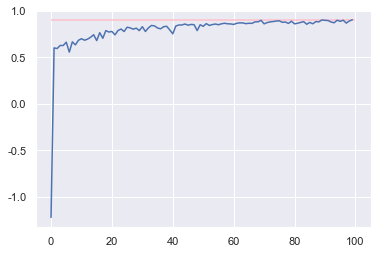

In [59]:
sns.set()
plt.hlines(0.9,0,100,colors='pink')
plt.plot(r2_score_list)